### Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: 

surgery, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [770]:
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

In [645]:
total_horse_data = pd.read_csv('horse_data.csv', na_values='?')
total_horse_data.head()

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [547]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     298 non-null    object 
 1   Age                         299 non-null    object 
 2   Rectal temperature          239 non-null    float64
 3   Pulse                       275 non-null    float64
 4   Respiratory rate            241 non-null    float64
 5   Temperature of extremities  243 non-null    object 
 6   Pain                        244 non-null    object 
 7   Outcome                     298 non-null    object 
dtypes: float64(3), object(5)
memory usage: 18.8+ KB


### Задание 2. Первичное изучение данных¶
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [978]:
# В DataFrame сохраняем нужные столбцы
df1 = total_horse_data.iloc[:,[0,1,3,4,5,6,10,22]] 

# Меняем заголовки столбцов на нужные нам для удобства восптриятия
df1.set_axis(['Surgery', 'Age', 'Rectal temperature', 'Pulse', 'Respiratory rate', 'Temperature of extremities', 'Pain', 'Outcome'], axis=1, inplace=True)

df1.loc[:, 'Age'].replace(9, 2, inplace=True) #Замена 9 на 2 -  вероятно ошибка ввода.По описательной части значение 1 или 2 

# Меняем числовые значения на категории в номинальных столбцах
df1['Outcome'].replace({1:'Lived', 2:'Died', 3:'Euthenized'}, inplace = True)
df1['Age'].replace({1:'Adult', 2:'Young'}, inplace = True)
df1['Surgery'].replace({1.0:'Yes', 2.0:'No'}, inplace = True)
df1['Temperature of extremities'].replace({1.0:'Normal', 2.0:'Warm', 3.0:'Coll', 4.0:'Cold'}, inplace = True)
df1['Pain'].replace({1:'No Pain', 2:'Depressed', 3:'Mild pain', 4:'Severe Pain', 5:'Greaterthansevere'}, inplace = True)

df1.sample(10)

,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
294,Yes,Adult,NaN,120.0,70.0,Cold,Depressed,Euthenized
0,Yes,Adult,39.2,88.0,20.0,NaN,Mild pain,Euthenized
101,No,Adult,38.3,40.0,16.0,Coll,Depressed,Lived
279,Yes,Adult,38.6,48.0,12.0,NaN,No Pain,Lived
107,Yes,Adult,38.7,60.0,32.0,Cold,Severe Pain,Euthenized
32,Yes,Adult,38.2,64.0,28.0,Normal,Mild pain,Lived
71,Yes,Adult,37.7,56.0,NaN,NaN,NaN,Died
7,No,Adult,NaN,80.0,36.0,Coll,Severe Pain,Euthenized
57,Yes,Adult,NaN,NaN,20.0,Cold,Greaterthansevere,Died
62,No,Adult,38.2,130.0,16.0,Cold,Depressed,Euthenized


In [979]:
# Расчитываем базовые  по температуре 
print('Average', round(df['Rectal temperature'].mean(),2))
print('Median', df['Rectal temperature'].median())
print('Moda = ', df['Rectal temperature'].mode())
print('Min', df['Rectal temperature'].min())
print('Max', df['Rectal temperature'].max())
print('Размах', round(df['Rectal temperature'].max() - df['Rectal temperature'].min(),2) )

Average 38.17
Median 38.2
Moda =  0    38.0
dtype: float64
Min 35.4
Max 40.8
Размах 5.4


In [980]:
# Общая статистика исключая не числовые столбы 
df1.describe(exclude='object')

,Rectal temperature,Pulse,Respiratory rate
count,239.000000,275.000000,241.000000
mean,38.166527,71.934545,30.427386
std,0.733508,28.680522,17.678256
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,18.000000
50%,38.200000,64.000000,24.000000
75%,38.500000,88.000000,36.000000
max,40.800000,184.000000,96.000000


In [981]:
# Расчитываем базовые  по пульсу
print('Average', round(df['Pulse'].mean(),2))
print('Median', df['Pulse'].median())
print('Moda = ', df['Rectal temperature'].mode())
print('Min', df['Pulse'].min())
print('Max', df['Pulse'].max())
print('Размах', round(df['Pulse'].max() - df['Pulse'].min(),2) )

Average 71.93
Median 64.0
Moda =  0    38.0
dtype: float64
Min 30.0
Max 184.0
Размах 154.0


In [982]:
# Раcсчитываем средние значения  относительно группы возраста
df1.groupby('Age')[['Rectal temperature', 'Pulse', 'Respiratory rate']].mean()

,Rectal temperature,Pulse,Respiratory rate
Age,,,
Adult,38.122831,67.462451,28.239819
Young,38.645000,123.363636,54.600000


In [983]:
# Расчет медианы по  по исходу и наличию операци 
df1.groupby(['Outcome', 'Surgery'])[['Rectal temperature', 'Pulse', 'Respiratory rate']].median()

Rectal temperature  Pulse  Respiratory rate
Outcome    Surgery                                             
Died       No                    38.00   92.0              30.0
           Yes                   38.10   84.0              30.0
Euthenized No                    38.20   85.0              20.0
           Yes                   38.00   80.0              32.0
Lived      No                    38.25   52.0              24.0
           Yes                   38.20   60.0              28.0

In [984]:
# СКО
print(df1['Rectal temperature'].std())
print(df1['Pulse'].std())
print(df1['Respiratory rate'].std())

0.7335083691537396
28.68052200365475
17.67825633053121


In [985]:
# Дисперсия
print(df1['Rectal temperature'].var())
print(df1['Pulse'].var())
print(df1['Respiratory rate'].var())

0.5380345276185787
822.5723424021243
312.5207468879668


In [986]:
# Межквартильный размах
Q1 = df1['Rectal temperature'].quantile(0.25)
Q3 = df1['Rectal temperature'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.7000000000000028

In [989]:
# Выбросы - Температура
q1 = df1['Rectal temperature'].quantile(0.25)
q3 = df1['Rectal temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
print(lower_bound)
upper_bound = q3 + (1.5 * iqr)
print(upper_bound)
remove_outliers = df1[df1['Rectal temperature'].between(lower_bound, upper_bound, inclusive=True)].sort_values('Rectal temperature')
remove_outliers

36.74999999999999
39.550000000000004


,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
112,Yes,Adult,36.8,60.0,28.0,NaN,NaN,Died
276,No,Adult,36.9,50.0,40.0,Warm,No Pain,Lived
291,Yes,Adult,37.0,66.0,20.0,Normal,Severe Pain,Died
69,No,Adult,37.0,60.0,20.0,Coll,Mild pain,Euthenized
262,Yes,Adult,37.1,75.0,36.0,NaN,Severe Pain,Died
...,...,...,...,...,...,...,...,...
119,Yes,Adult,39.4,54.0,66.0,Normal,Depressed,Lived
286,No,Young,39.5,84.0,30.0,NaN,NaN,Lived
161,No,Adult,39.5,60.0,10.0,Coll,Mild pain,Lived
230,No,Adult,39.5,92.0,28.0,Coll,Greaterthansevere,Died


In [570]:
# Что это за выбросы?
pd.concat([df1, remove_outliers]).drop_duplicates(keep=False)

,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
4,No,Adult,NaN,NaN,NaN,Warm,Depressed,Lived
6,Yes,Adult,NaN,60.0,NaN,Coll,NaN,Died
7,No,Adult,NaN,80.0,36.0,Coll,Severe Pain,Euthenized
15,Yes,Young,NaN,128.0,36.0,Coll,Severe Pain,Died
19,Yes,Adult,39.9,72.0,60.0,Normal,Greaterthansevere,Lived
...,...,...,...,...,...,...,...,...
273,Yes,Adult,NaN,76.0,NaN,NaN,NaN,Euthenized
280,No,Adult,40.0,78.0,NaN,Coll,Depressed,Died
292,Yes,Adult,NaN,78.0,24.0,Coll,NaN,Euthenized
294,Yes,Adult,NaN,120.0,70.0,Cold,Depressed,Euthenized


<AxesSubplot:ylabel='Rectal temperature'>

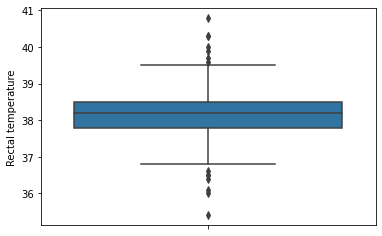

In [991]:
sea.boxplot(data=df1, y='Rectal temperature')

In [992]:
# Выбросы - Pulse
q1_p = df1['Pulse'].quantile(0.25)
q3_p = df1['Pulse'].quantile(0.75)
iqr_p = q3 - q1
lower_bound_p = q1_p - (1.5 * iqr_p) 
print(lower_bound_p)
upper_bound_p = q3_p + (1.5 * iqr_p)
print(upper_bound_p)
remove_outliers_p = df1[df1['Pulse'].between(lower_bound_p, upper_bound_p, inclusive=True)].sort_values('Pulse')
remove_outliers_p

46.949999999999996
89.05000000000001


,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
148,No,Adult,38.7,48.0,24.0,NaN,No Pain,Lived
59,No,Adult,37.8,48.0,32.0,Normal,Depressed,Lived
93,No,Adult,37.5,48.0,30.0,Cold,NaN,Lived
94,Yes,Adult,37.3,48.0,20.0,NaN,Mild pain,Lived
260,No,Adult,38.4,48.0,16.0,Warm,No Pain,Lived
...,...,...,...,...,...,...,...,...
96,Yes,Adult,38.1,88.0,32.0,Coll,Depressed,Euthenized
246,Yes,Adult,38.1,88.0,24.0,Coll,Greaterthansevere,Died
130,No,Adult,37.6,88.0,36.0,Coll,Mild pain,Died
193,No,Adult,37.9,88.0,24.0,Normal,Depressed,Lived


In [993]:
pd.concat([df1, remove_outliers_p]).drop_duplicates(keep=False)

,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
1,No,Adult,38.3,40.0,24.0,Normal,Mild pain,Lived
2,Yes,Young,39.1,164.0,84.0,Cold,Depressed,Died
3,No,Adult,37.3,104.0,35.0,NaN,NaN,Died
4,No,Adult,NaN,NaN,NaN,Warm,Depressed,Lived
8,No,Young,38.3,90.0,NaN,Normal,Greaterthansevere,Lived
...,...,...,...,...,...,...,...,...
289,No,Adult,38.6,45.0,16.0,Warm,No Pain,Lived
293,No,Adult,38.5,40.0,16.0,Normal,Depressed,Lived
294,Yes,Adult,NaN,120.0,70.0,Cold,Depressed,Euthenized
297,Yes,Adult,36.5,100.0,24.0,Coll,Mild pain,Lived


<AxesSubplot:ylabel='Pulse'>

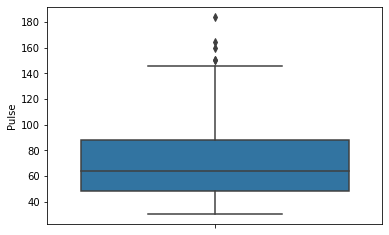

In [994]:
sea.boxplot(data=df1, y='Pulse')

In [995]:
# Выбросы - Respiratory rate
q1_r = df1['Respiratory rate'].quantile(0.25)
q3_r = df1['Respiratory rate'].quantile(0.75)
iqr_r = q3 - q1
lower_bound_r = q1_r - (1.5 * iqr_r) 
print(lower_bound_r)
upper_bound_r = q3_r + (1.5 * iqr_r)
print(upper_bound_r)
remove_outliers_r = df1[df1['Respiratory rate'].between(lower_bound_r, upper_bound_r, inclusive=True)].sort_values('Respiratory rate')
remove_outliers_r

16.949999999999996
37.050000000000004


,Surgery,Age,Rectal temperature,Pulse,Respiratory rate,Temperature of extremities,Pain,Outcome
191,Yes,Adult,38.2,48.0,18.0,Normal,Mild pain,Lived
216,Yes,Adult,38.0,76.0,18.0,NaN,NaN,Lived
250,No,Adult,36.6,42.0,18.0,Coll,No Pain,Died
266,No,Adult,38.3,54.0,18.0,Coll,Depressed,Lived
231,Yes,Adult,38.5,30.0,18.0,NaN,NaN,Lived
...,...,...,...,...,...,...,...,...
251,Yes,Young,38.8,124.0,36.0,Coll,Depressed,Died
15,Yes,Young,NaN,128.0,36.0,Coll,Severe Pain,Died
130,No,Adult,37.6,88.0,36.0,Coll,Mild pain,Died
63,Yes,Adult,39.0,64.0,36.0,Coll,Mild pain,Lived


<AxesSubplot:ylabel='Respiratory rate'>

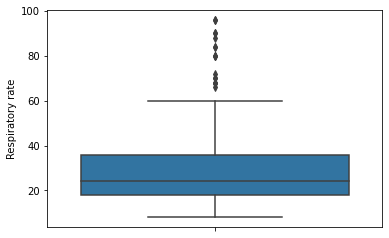

In [996]:
sea.boxplot(data=df1, y='Respiratory rate')

### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.


In [999]:
df_skips = total_horse_data.iloc[:,[0,1,3,4,5,6,10,22]] 
df_skips.set_axis(['Surgery', 'Age', 'Rectal temperature', 'Pulse', 'Respiratory rate', 'Temperature of extremities', 'Pain', 'Outcome'], axis=1, inplace=True)

# Меняем числовые значения на категорию в номенальных столбцах
df_skips.loc[:,'Outcome'].replace({1:'Lived', 2:'Died', 3:'Euthenized'}, inplace = True)
df_skips.loc[:,'Age'].replace({1:'Adult', 2:'Young'}, inplace = True)
df_skips.loc[:,'Surgery'].replace({1.0:'Yes', 2.0:'No'}, inplace = True)
df_skips.loc[:,'Temperature of extremities'].replace({1.0:'Normal', 2.0:'Warm', 3.0:'Coll', 4.0:'Cold'}, inplace = True)
df_skips.loc[:,'Pain'].replace({1:'No Pain', 2:'Depressed', 3:'Mild pain', 4:'Severe Pain', 5:'Greaterthansevere'}, inplace = True)

df_skips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     298 non-null    object 
 1   Age                         299 non-null    object 
 2   Rectal temperature          239 non-null    float64
 3   Pulse                       275 non-null    float64
 4   Respiratory rate            241 non-null    float64
 5   Temperature of extremities  243 non-null    object 
 6   Pain                        244 non-null    object 
 7   Outcome                     298 non-null    object 
dtypes: float64(3), object(5)
memory usage: 18.8+ KB


In [1000]:
# Кол-во пропусков для всех столбцовв
(df_skips.isna().sum())

Surgery                        1
Age                            0
Rectal temperature            60
Pulse                         24
Respiratory rate              58
Temperature of extremities    56
Pain                          55
Outcome                        1
dtype: int64

In [1001]:
# Вариант с созданием df с кол-вом пропусков
null = pd.concat([df_skips.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
Surgery,1
Rectal temperature,60
Pulse,24
Respiratory rate,58
Temperature of extremities,56
Pain,55
Outcome,1


In [1005]:
# Единственный пропуск в столбце Surgery заменяем модой. Или можно не менять , не ведет к искажению результатов.
df_skips.loc[:,'Surgery'].fillna(df_skips['Surgery'].mode()[0], inplace=True)
df_skips['Surgery'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Surgery', ylabel='count'>

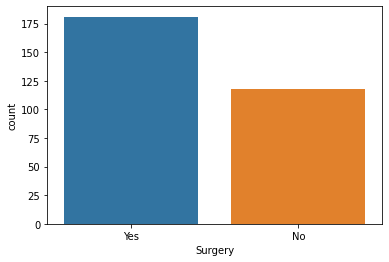

In [1006]:
sea.countplot(data=df_skips, x='Surgery')

In [1007]:
# В стобце Rectal temperature нормальное распределение данных , поэтому пропуски заполняем медианой

<AxesSubplot:xlabel='Rectal temperature', ylabel='Count'>

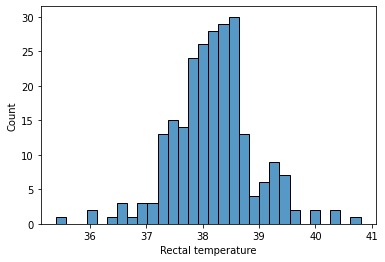

In [1015]:
# Распределение темп до заполнения пропусков
sea.histplot(df_skips['Rectal temperature'], bins=30)

In [1017]:
# После заполнения медианой
df_skips.loc[:, 'Rectal temperature'].fillna(df_skips['Rectal temperature'].median(), inplace=True)
df_skips['Rectal temperature'].unique()

array([39.2, 38.3, 39.1, 37.3, 38.2, 37.9, 38.1, 37.2, 38. , 37.6, 37.5,
       39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9, 37.4, 40.3,
       38.5, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5, 36. ,
       37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

<AxesSubplot:xlabel='Rectal temperature', ylabel='Count'>

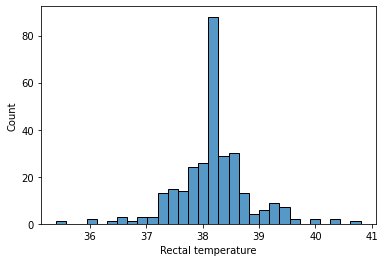

In [1020]:
sea.histplot(df_skips['Rectal temperature'],bins=30)

<AxesSubplot:xlabel='Pulse', ylabel='Count'>

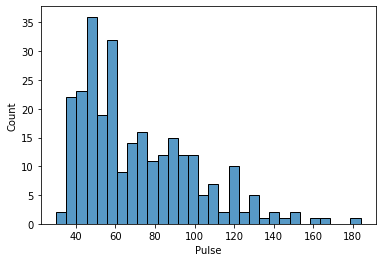

In [1022]:
sea.histplot(df_skips['Pulse'],bins=30)

C:\Users\vagin\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:xlabel='Pulse', ylabel='Count'>

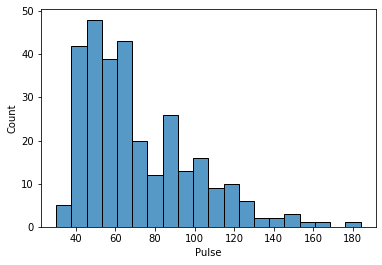

In [1031]:
df_skips.loc[:,'Pulse'].fillna(df_skips['Pulse'].median(), inplace=True)
df_skips['Pulse'].unique()
sea.histplot(df_skips['Pulse'],bins=20)

<AxesSubplot:xlabel='Respiratory rate', ylabel='Count'>

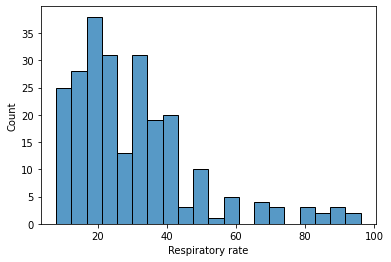

In [1033]:
sea.histplot(df_skips['Respiratory rate'],bins=20)

C:\Users\vagin\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:xlabel='Respiratory rate', ylabel='Count'>

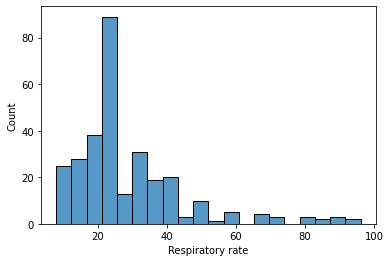

In [1034]:
df_skips.loc[:,'Respiratory rate'].fillna(df_skips['Respiratory rate'].median(), inplace=True)
sea.histplot(df_skips['Respiratory rate'],bins=20)

<AxesSubplot:xlabel='Temperature of extremities', ylabel='count'>

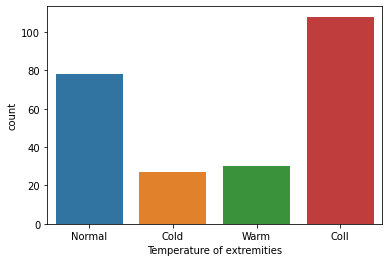

In [961]:
# Категориальные стобцы заполняем модой 
sea.countplot(data=df_skips, x='Temperature of extremities')

In [1036]:
df_skips.loc[:,'Temperature of extremities'].fillna(df_skips['Temperature of extremities'].mode()[0], inplace=True)
df_skips['Temperature of extremities'].unique()

array(['Coll', 'Normal', 'Cold', 'Warm'], dtype=object)

<AxesSubplot:xlabel='Temperature of extremities', ylabel='count'>

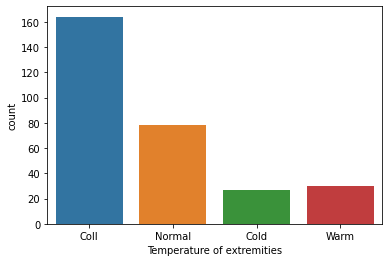

In [1037]:
sea.countplot(data=df_skips, x='Temperature of extremities')

C:\Users\vagin\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:xlabel='Pain', ylabel='count'>

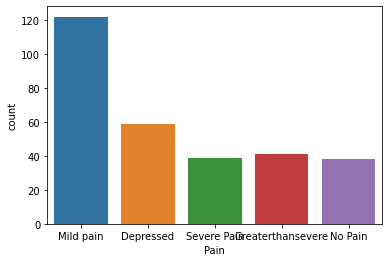

In [1039]:
df_skips.loc[:,'Pain'].fillna(df_skips['Pain'].mode()[0], inplace=True)
sea.countplot(data=df_skips, x='Pain')

In [1040]:
# Итоговый df
df_skips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     299 non-null    object 
 1   Age                         299 non-null    object 
 2   Rectal temperature          299 non-null    float64
 3   Pulse                       299 non-null    float64
 4   Respiratory rate            299 non-null    float64
 5   Temperature of extremities  299 non-null    object 
 6   Pain                        299 non-null    object 
 7   Outcome                     298 non-null    object 
dtypes: float64(3), object(5)
memory usage: 18.8+ KB
